## EXERC1_TP3 ##

In [2]:
pip install gymnasium


  Using cached Farama_Notifications-0.0.4-py3-none-any.whl.metadata (558 bytes)
   ---------------------------------------- 0.0/965.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/965.4 kB ? eta -:--:--
   ---------- ----------------------------- 262.1/965.4 kB ? eta -:--:--
   ---------- ----------------------------- 262.1/965.4 kB ? eta -:--:--
   ---------- ----------------------------- 262.1/965.4 kB ? eta -:--:--
   ---------- ----------------------------- 262.1/965.4 kB ? eta -:--:--
   ---------- ----------------------------- 262.1/965.4 kB ? eta -:--:--
   ---------- ----------------------------- 262.1/965.4 kB ? eta -:--:--
   -------------------------------------- 965.4/965.4 kB 616.4 kB/s eta 0:00:00
Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)


In [3]:
import gymnasium as gym
import numpy as np 




In [4]:
from traffic_env import TrafficEnvironment

🚦 Initial Traffic Light Simulation 🚦
State Format: [Cars North, Cars South, Cars East, Cars West]
Actions: 0 = Keep Current Light, 1 = Switch Light
Initial state: [5 2 1 2] (NS Green, EW Red)
Step 1:
  ➡ Action Taken: 1 (Switch)
  🚥 Light Status: EW Green, NS Red
  🏎 Cars State: [7 3 1 0]
  🎯 Reward (Cars Passed): 3
----------------------------------------
Step 2:
  ➡ Action Taken: 1 (Switch)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [5 0 1 2]
  🎯 Reward (Cars Passed): 4
----------------------------------------
Step 3:
  ➡ Action Taken: 1 (Switch)
  🚥 Light Status: EW Green, NS Red
  🏎 Cars State: [5 1 0 2]
  🎯 Reward (Cars Passed): 3
----------------------------------------
Step 4:
  ➡ Action Taken: 1 (Switch)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [0 2 2 3]
  🎯 Reward (Cars Passed): 5
----------------------------------------
Step 5:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [0 2 3 4]
  🎯 Reward (Cars Passed): 2
----------------

In [5]:
env=TrafficEnvironment()
state=env.reset()

for _ in range(10):
    action=0
    next_state,reward=env.step(action)
    print(f'Etat : {next_state},Récompense : {reward} ')


Etat : [2 0 5 5],Récompense : 2 
Etat : [3 1 6 5],Récompense : 1 
Etat : [1 2 8 7],Récompense : 3 
Etat : [ 1  0 10  9],Récompense : 3 
Etat : [ 0  0 12  9],Récompense : 1 
Etat : [ 2  2 13  9],Récompense : 0 
Etat : [ 0  1 14  9],Récompense : 4 
Etat : [ 2  0 14 11],Récompense : 1 
Etat : [ 1  1 16 11],Récompense : 2 
Etat : [ 2  1 16 12],Récompense : 2 


## EXERC2_TP3 ##

In [23]:
import numpy as np
from traffic_env import TrafficEnvironment  # Assure-toi que ce fichier existe

# Paramètres
nb_etats = 10  # À ajuster en fonction de l'environnement
nb_actions = 2  # 0 = garder le feu, 1 = changer le feu
alpha = 0.1  # Taux d'apprentissage
gamma = 0.9  # Facteur de réduction
epsilon = 1.0  # Probabilité d'exploration
epsilon_decay = 0.99  # Diminution d'epsilon à chaque épisode

# Initialisation de l'environnement et de la Q-table
env = TrafficEnvironment()
q_table = np.zeros((nb_etats, nb_actions))  # Vérifie que nb_etats est correct

# Fonction pour convertir un état en un indice utilisable dans la Q-table
def get_state_index(state):
    """Transforme l'état en un indice unique si nécessaire."""
    return min(sum(state) // len(state), nb_etats - 1)  # Ex: moyenne des valeurs des voies

# Boucle d'entraînement
learn_rewards = []

for episode in range(1000):  
    state = env.reset()
    state_index = get_state_index(state)
    total_reward = 0

    for _ in range(50):
        # Choix de l'action (exploration vs exploitation)
        if np.random.rand() < epsilon:
            action = np.random.choice(nb_actions)
        else:
            action = np.argmax(q_table[state_index])

        # Exécution de l'action dans l'environnement
        next_state, reward = env.step(action)
        next_state_index = get_state_index(next_state)

        # Mise à jour de la Q-Table avec la formule du Q-Learning
        q_table[state_index, action] = q_table[state_index, action] + alpha * (reward + gamma * np.max(q_table[next_state_index]) - q_table[state_index, action])

        # Mise à jour de l'état et de la récompense totale
        state_index = next_state_index
        total_reward += reward

    learn_rewards.append(total_reward)

    # Diminuer epsilon pour réduire l'exploration au fil du temps
    epsilon *= epsilon_decay

print("Apprentissage terminé ! ")
print("Q-Table finale :")
print(q_table)

Apprentissage terminé ! 
Q-Table finale :
[[29.02739669 30.19561201]
 [30.79699042 31.89326919]
 [32.01045295 33.19645378]
 [33.66880369 35.25636383]
 [34.795791   35.74527049]
 [29.16724476 36.80755818]
 [17.90639077 37.43698194]
 [ 4.2449845  36.7604655 ]
 [15.65974019  0.        ]
 [ 0.          0.4432    ]]


## EXERC3_TP3 ##

In [24]:
import numpy as np
from traffic_env import TrafficEnvironment  # Assure-toi que ce fichier existe

# Paramètres
nb_etats = 10  # À ajuster selon l'environnement
nb_actions = 2  # 0 = garder le feu, 1 = changer le feu
alpha = 0.1  # Taux d'apprentissage
gamma = 0.9  # Facteur d'actualisation
epsilon = 1.0  # Probabilité d'exploration
epsilon_decay = 0.99  # Diminution progressive d'epsilon

# Initialisation de l'environnement et de la Q-table
env = TrafficEnvironment()
q_table= np.zeros((nb_etats, nb_actions))  # Initialisation à zéro

# Fonction pour convertir un état en un indice utilisable dans la Q-table
def get_state_index(state):
    """Transforme un état en un indice discret utilisable dans la Q-table."""
    return min(sum(state) // len(state), nb_etats - 1)  # Exemple: moyenne du trafic sur les voies

# Boucle d'apprentissage SARSA
sarsa_rewards = []

for episode in range(1000):  
    state = env.reset()
    state_index = get_state_index(state)
    total_reward = 0
    action = np.random.choice(nb_actions) if np.random.rand() < epsilon else np.argmax(q_table[state_index])

    for _ in range(50):
        next_state, reward = env.step(action)
        next_state_index = get_state_index(next_state)
        next_action = np.random.choice(nb_actions) if np.random.rand() < epsilon else np.argmax(q_table[next_state_index])
        total_reward += reward  # Ajouter la récompense reçue
        
        q_table[state_index, action] += alpha * (reward + gamma * q_table[next_state_index, next_action] - q_table[state_index, action])
        
        state_index, action = next_state_index, next_action

    sarsa_rewards.append(total_reward)
    


    # Réduction progressive d'epsilon
    epsilon *= epsilon_decay

print("Apprentissage SARSA terminé !")
print("Q-Table finale :")
print(q_table)


Apprentissage SARSA terminé !
Q-Table finale :
[[29.20468566 30.48162732]
 [30.67006515 31.95283889]
 [32.25775326 33.65056865]
 [33.7171755  35.16856454]
 [33.43255668 36.33820468]
 [31.58471446 37.09485596]
 [37.24706036 16.00033625]
 [ 0.         37.19496638]
 [21.40666134  0.        ]
 [ 0.          0.        ]]


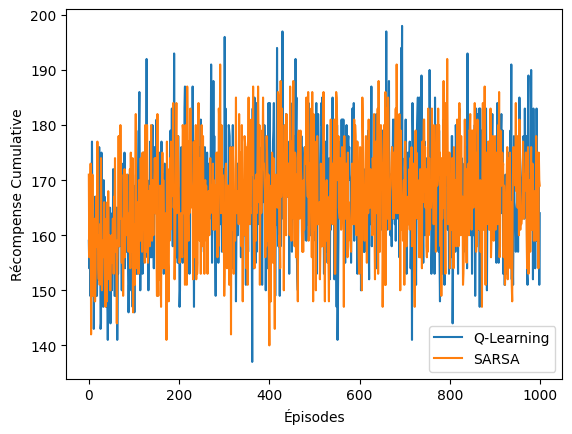

In [26]:
import matplotlib.pyplot as plt

# Supposons que `q_learning_rewards` et `sarsa_rewards` sont des listes de récompenses cumulées
plt.plot(sarsa_rewards, label="Q-Learning")
plt.plot(learn_rewards, label="SARSA")
plt.xlabel("Épisodes")
plt.ylabel("Récompense Cumulative")
plt.legend()
plt.show()


In [6]:
import numpy as np
import random

# Initialisation de la Q-table
q_table = np.zeros((5, 5, 5, 5, 2))
print(q_table)

def train_q_learning(env, episodes=10, alpha=0.1, gamma=0.9, epsilon=1.0, decay=0.995):
    global q_table  
    nombre_actions = 2  # Nombre d'actions possibles

    for episode in range(episodes):
        state = tuple(np.clip(env.reset(), 0, 9))  # S'assurer que l'état est dans la plage
        done = False

        while not done:
            # Choisir une action (ε-greedy)
            if np.random.rand() < epsilon:
                action = random.randint(0, nombre_actions - 1)  # Exploration
            else:
                action = np.argmax(q_table[state])  # Exploitation
            
            # Exécuter l'action et récupérer les valeurs
            result = env.step(action)

            if len(result) == 2:  
                next_state, reward = result
                done = False  
            elif len(result) == 4:  
                next_state, reward, done, _ = result
            elif len(result) == 5:  
                next_state, reward, done, truncated, _ = result
                done = done or truncated  

            # Vérification des limites
            next_state = tuple(np.clip(next_state, 0, 9))  

            # Mise à jour de la Q-table
            q_table[state + (action,)] += alpha * (
                reward + gamma * np.max(q_table[next_state]) - q_table[state + (action,)]
            )

            # Passer à l'état suivant
            state = next_state  

        # Réduction de epsilon pour favoriser l'exploitation avec le temps
        epsilon = max(0.01, epsilon * decay)

    print("\nQ-Table après apprentissage : \n")
    print(q_table)

# Assurez-vous que `env` est bien défini avant d'appeler cette fonction
train_q_learning(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=1.0, decay=0.995)


[[[[[0. 0.]
    [0. 0.]
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    [0. 0.]
    [0. 0.]]]


  [[[0. 0.]
    [0. 0.]
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    [0. 0.]
    [0. 0.]]]


  [[[0. 0.]
    [0. 0.]
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    [0. 0.]
    [0. 0.]]

   [[0. 0.]
    [0. 0.]
    [0. 0.]
    [0. 0.]
    [0. 0.]]]


  [[[0. 0.]
    [0. 0.]
    [0. 0.]
    [0. 0.]
    [0. 0.]]

  

IndexError: index 5 is out of bounds for axis 1 with size 5